# Exploration of the auto_mpg data set

This notebook presents an exploration of the auto_mpg dataset, using python and pandas. This is the same data set you were asked to investigate using your preferred tools.

Students are recommended to run the notebook one cell at a time using the "play" button above.

Note that the notebook assumes that the data is placed in a `data/` subfolder of the folder where the notebook has been placed. This convention is common in machine learning.

_For convenience, here is the spec from the previous exercise:_

For each attribute (column) find the following information.
  * The attribute type, e.g. nominal, ordinal, numeric.
  * Percentage of missing values in the data.
  * Statistical numerical measures - centre (mean, median, mode), spread (min, max, range, standard deviation), symmetry (skewness).
  * Statistical graphical representations &mdash; bar plots, histograms, ... even pie charts, although they can be difficult to interpret, and [better alternatives exist](https://www.data-to-viz.com/caveat/pie.html).
  * Are there any rows that have a value for the attribute that no other record has (i.e. unique values)?
  * Are there any outliers?
  * Which attributes seem to be linked?

In [14]:
import pandas as pd
auto_mpg = pd.read_csv('data/auto-mpg.csv')
auto_mpg.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/auto-mpg.csv'

## Display the data type of each column in the dataframe.

`.dtypes()` returns a pandas _Series.

In [30]:
auto_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

`float64` and `int64` are numeric columns. An object column means that python was unable to decide what datatype the column contains. It is likely that it is a mixed type, so we can look at the individual values.

In [31]:
auto_mpg["car name"].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

Note that some cars appears multiple times, so it is interesting to see why that might happen.

In [32]:
auto_mpg.loc[auto_mpg['car name'] == 'ford pinto']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
112,19.0,4,122.0,85,2310,18.5,73,1,ford pinto
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
168,23.0,4,140.0,83,2639,17.0,75,1,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,1,ford pinto
206,26.5,4,140.0,72,2565,13.6,76,1,ford pinto


Note that the 'ford pinto' cars differ by model year. So in this case, it suggests the `car name` is a simple description of the car, but is not enough on its own to be used to identify individual rows in the dataframe. In database terms, it is not enough to act as a primary key for the dataframe.

Also notice that the other `object` type column (i.e., `horsepower`) contains numeric values and '?', which is often used as a placeholder for missing data. We can take a look at the column to assess what it contains.

In [33]:
auto_mpg["horsepower"].values

array(['130', '165', '150', '150', '140', '198', '220', '215', '225',
       '190', '170', '160', '150', '225', '95', '95', '97', '85', '88',
       '46', '87', '90', '95', '113', '90', '215', '200', '210', '193',
       '88', '90', '95', '?', '100', '105', '100', '88', '100', '165',
       '175', '153', '150', '180', '170', '175', '110', '72', '100', '88',
       '86', '90', '70', '76', '65', '69', '60', '70', '95', '80', '54',
       '90', '86', '165', '175', '150', '153', '150', '208', '155', '160',
       '190', '97', '150', '130', '140', '150', '112', '76', '87', '69',
       '86', '92', '97', '80', '88', '175', '150', '145', '137', '150',
       '198', '150', '158', '150', '215', '225', '175', '105', '100',
       '100', '88', '95', '46', '150', '167', '170', '180', '100', '88',
       '72', '94', '90', '85', '107', '90', '145', '230', '49', '75',
       '91', '112', '150', '110', '122', '180', '95', '?', '100', '100',
       '67', '80', '65', '75', '100', '110', '105', '140', '1

As can be seen, `horsepower` generally contains numeric data but this data is stored as strings, because some `horsepower` values are represented using `'?'`. So if we wish to work with this data we should

1. remove the `'?'` placeholders - this is missing data and should be recognised as such
2. convert the remaining values from string to numeric, so that they match the intended use of this column.

In later weeks, we will cover how to perform these "data fixes" using pandas and python more generally.

## Looking for missing values

The usual way to look for missing values is to look for null values using the `.isnull()` function. For floating point data we can also use the `.isna` function, which checks whether a floating point value is NaN (Not a Number).

We can apply `.isnull()` to an entire dataframe, or to a row, or a column or indeed a single value. The function returns a dataframe, a row series, a column series of `bool` values, as appropriate. In python, a `bool` value of `False` is treated as `0` and a `bool` value of `True` is treats as 1. We can count the `.isnull() == True` values by summing them using `.sum()`.

Firstly, we look across the entire dataframe.

In [34]:
auto_mpg.isnull().sum().sum()

0

Here is how we can apply `.isnull()` and `sum()` to count the number of null values in the `auto_mpg["horsepower"]` column. Note that there appear to be none, owing to their replacement with `'?'`.

In [35]:
auto_mpg["horsepower"].isnull().sum()

0

Perhaps a better check in this case is to count the number of `'?'` characters in the column.

In [36]:
pd.Series(auto_mpg["horsepower"]=='?').sum()

6

So there are 6 rows with missing horsepower values.... The number of rows can be obtained from the `.shape` tuple, as follows, where it is clear that there are 398 rows and 9 columns.

In [37]:
auto_mpg.shape

(398, 9)

So the percentage of rows missing a value can be calculated using

In [38]:
numMissingRows = pd.Series(auto_mpg["horsepower"]=='?').sum()
numRows = auto_mpg.shape[0]
percentMissingRows = round(100*numMissingRows/numRows,1)
percentMissingRows

1.5

## Statistical numerical measures

For the numeric-valued columns, we can compute a number of statistics (measures). Just using the `weight` column as an example, here is how you could get several measures at once:

In [39]:
auto_mpg["weight"].describe()

count     398.000000
mean     2970.424623
std       846.841774
min      1613.000000
25%      2223.750000
50%      2803.500000
75%      3608.000000
max      5140.000000
Name: weight, dtype: float64

Alternatively, you could calculate the mean of several columns using the following:

In [40]:
auto_mpg[["displacement","weight"]].mean()

displacement     193.425879
weight          2970.424623
dtype: float64

Note that `["displacement","weight"]` is a (python) list containing the two column names.

## Statistical plots

Plots greatly help data exploration. With experience, it is possible to observe many useful aspects, including:

1. distribution of a single variable
3. relationship of one variable against another

Again we will use `displacement` (engine size) and `weight` as the variables we wish to consider.

Python does not have built-in plotting capability, so we need to import some "standard" plotting libraries use in python-based machine learning. The first of these is `matplotlib` which is comprehensive but can take effort to configure the output. The second is `seaborn` which provides a higher-level abstraction, but requires `matplotlib` to support its operations. `seaborn` has many styling options, just showing one here....

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

The first 2 plots show the distribution of `weight` and `displacement`, each as a histogram. The plots are placed side-by-side to make them easier to compare.

Text(0.5, 0, 'displacement')

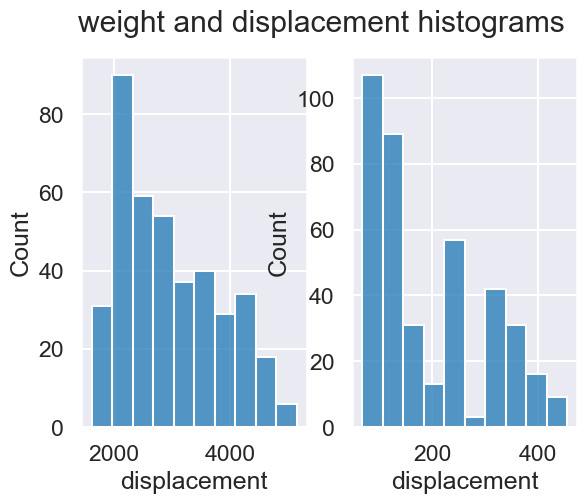

In [42]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('weight and displacement histograms')
v='weight'
sns.histplot(ax=ax1, x=auto_mpg[v])
ax1.set_xlabel(v)
v='displacement'
sns.histplot(ax=ax2, x=auto_mpg[v])
ax1.set_xlabel(v)

The origin is coded as 1:USA, 2:Europe and 3:Japan. To make the plots easier to understand, we will add a `country` column, as follows:

In [43]:
auto_mpg['country'] = auto_mpg['origin'].replace([1,2,3],['USA','Europe','Japan'])
auto_mpg['country'].value_counts()

country
USA       249
Japan      79
Europe     70
Name: count, dtype: int64

Note that is is good practice to check that an operation like this was successful. It is also noticeable that most of the cars in the dataset were manufactured in the USA.

Now we can create a boxplot of `displacement` and of `weight`, and overlay it with the overall median of that variable.

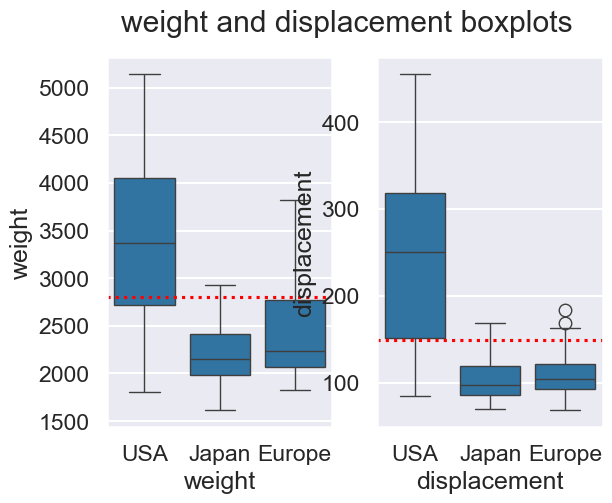

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('weight and displacement boxplots')
v = 'weight'
sns.boxplot(ax=ax1, x='country', y=v, data=auto_mpg)
ax1.set_xlabel(v)
ax1.axhline(auto_mpg[v].median(), color='r', linestyle='dotted')
v = 'displacement'
sns.boxplot(ax=ax2, x='country', y=v, data=auto_mpg)
ax2.set_xlabel(v)
ax2.axhline(auto_mpg[v].median(), color='r', linestyle='dotted')

Clearly 1970s cars from the USA had considerably larger engines and were much heavier than their European or Japanese equivalents!

Lastly we will look at how 'displacement` and `weight` are related. Again, we will highlight the country of origin, by using a different colour for each country in the scatterplot below.

We will also show a trend line for each subset, noting that the trend depends on the country.

Lastly, we can also save the plot in a file as a portable network graphic (PNG) file. Note that `savefig()` uses the file extension to select the type of output graphic file.

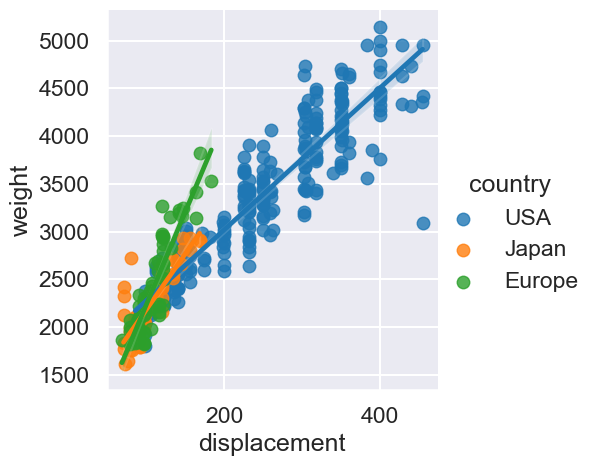

In [45]:
plot = sns.lmplot(x='displacement', y='weight', data=auto_mpg, hue='country')
plot.savefig("weightVSdisplacement.png")

Assuming there are not too many numerical columns, we can generate a pairwise scatterplot, to see at a glance the relationships in the data.

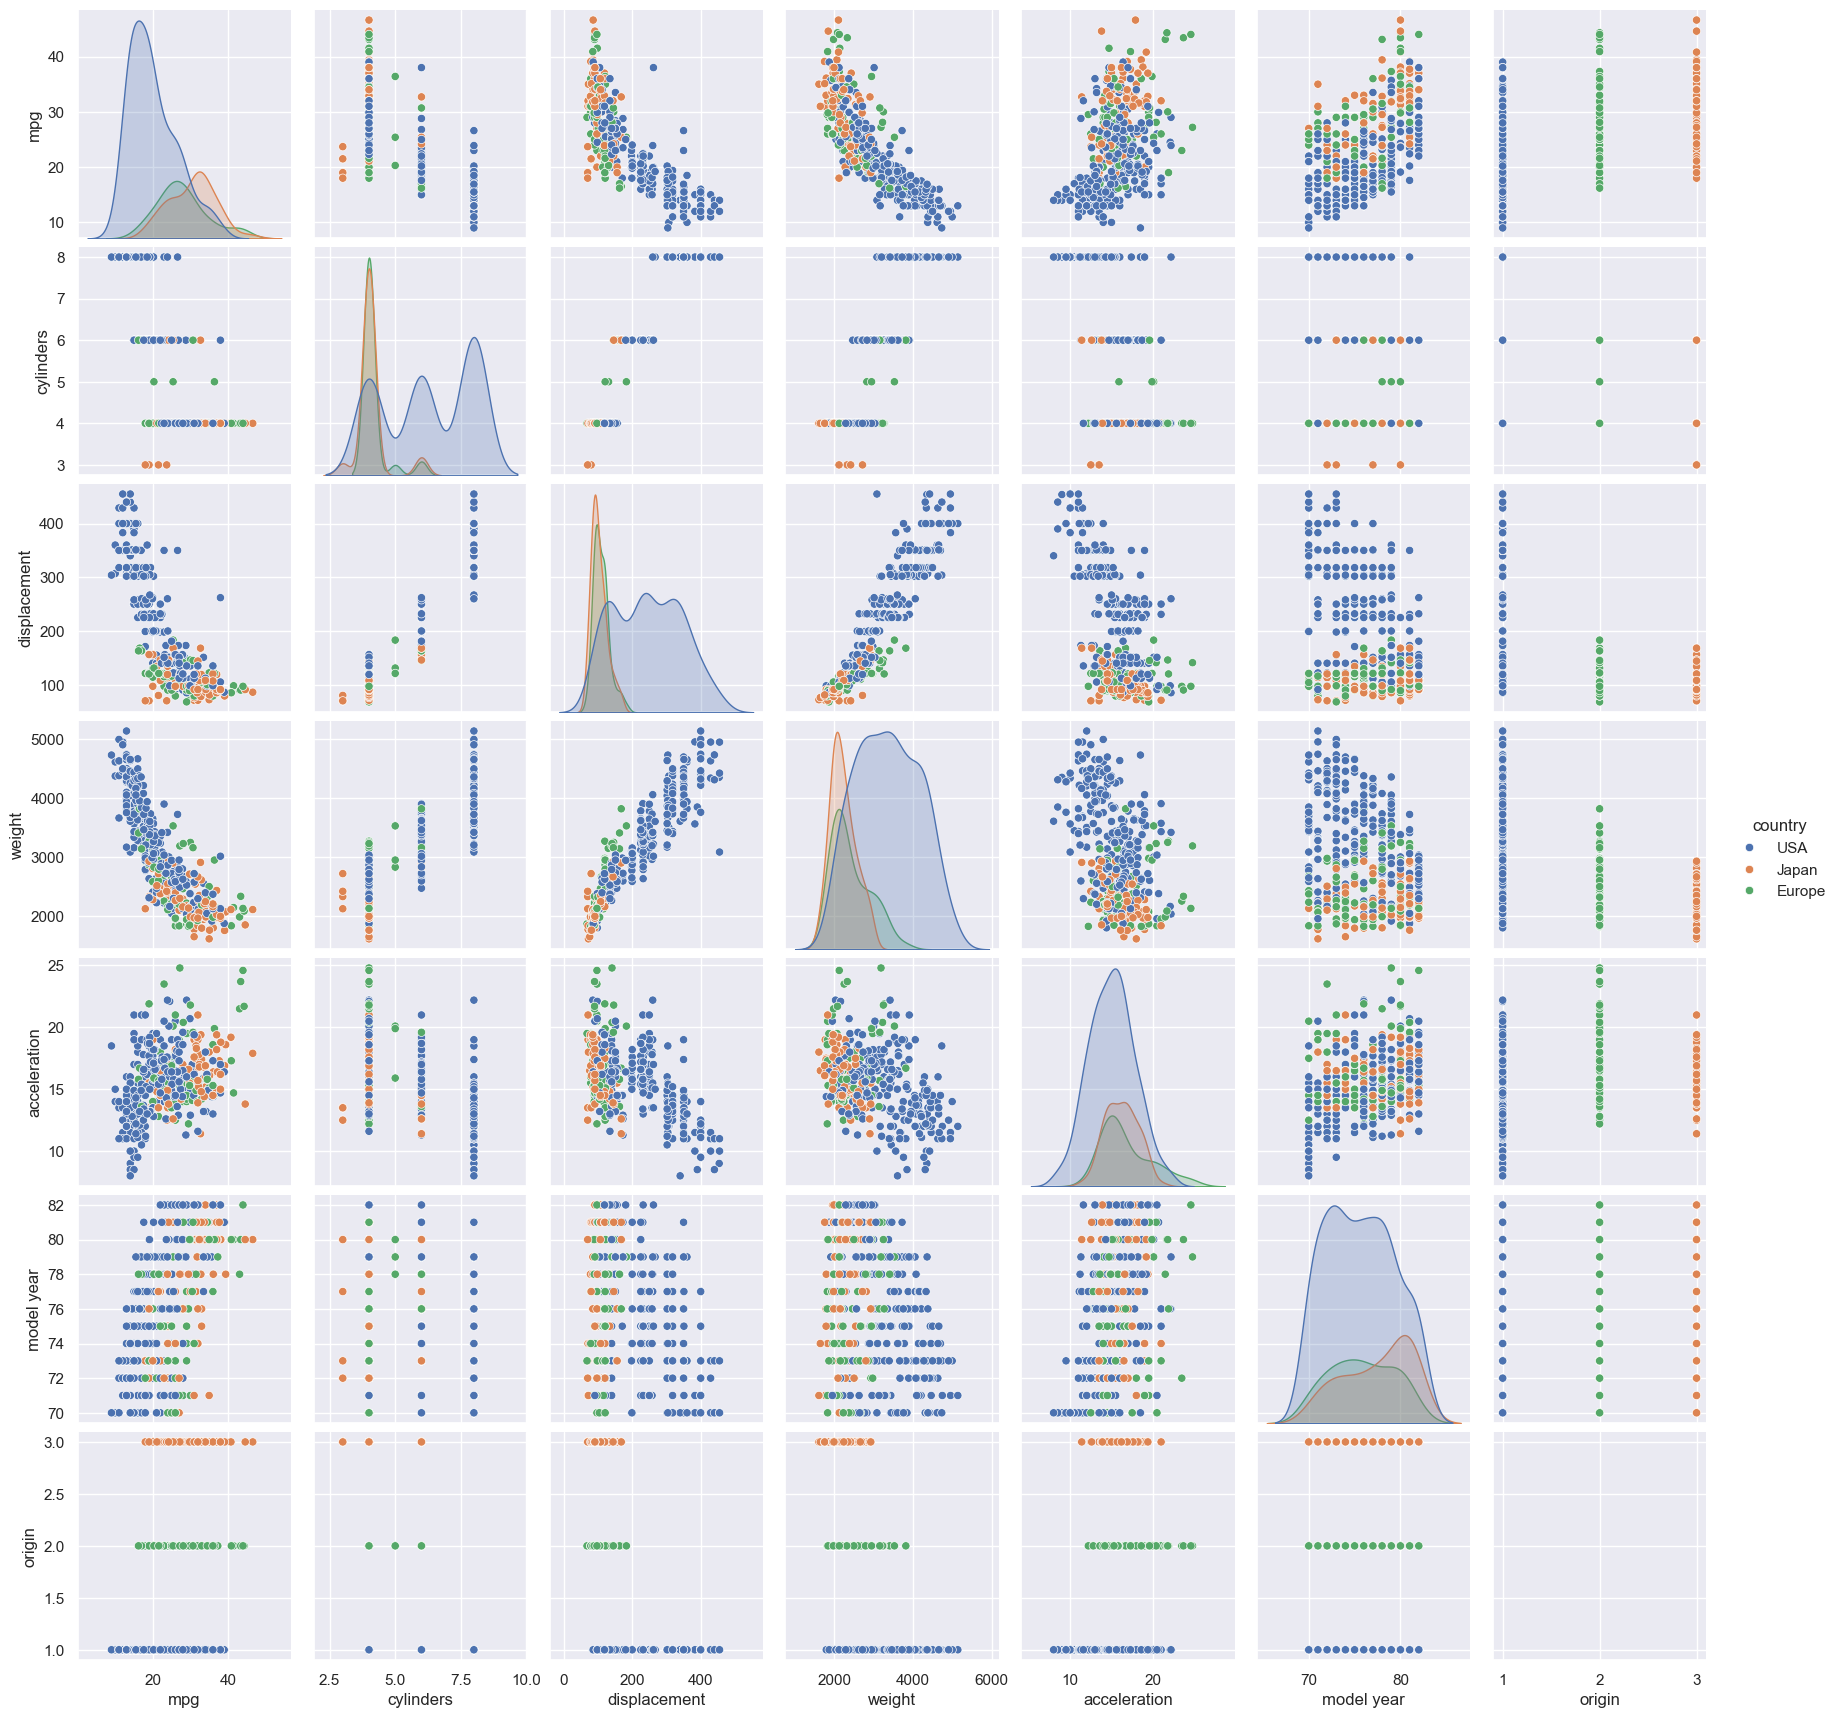

In [46]:
sns.set()
sns.pairplot(auto_mpg, hue ='country')
plt.show()

Studying this pairsplot yields many insights into the data. We can choose more specific plots to learn more and check our understanding.

## Are there any rows that have a value for the attribute that no other record has (i.e. unique values)?

We have already seen how to get a count of specific values in each column. We are looking for columns that have a value that appears only once.

We can loop over the columns in the dataframe and use `.value_counts()` on each volumn.

In [47]:
for col in auto_mpg.columns:
  print(auto_mpg[col].value_counts())

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64
horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64
weight
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: count, Length: 351, dtype: int64
acceleration
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: count, Length: 95, dtype: int64
model year
73    40
78    36
76    34
82    31
75    30
70    29
79    29
80    29
81

As can be seen, columns like `mpg`, `displacement`, `horsepower`, `weight` and `acceleration` include unique values, but that might be expected. It would be more significant in columns where the number of values is limited.

## Are there any outliers?

Yes. There are many techniques for finding outliers, but one of the easiest ways to find outliers from a single variable is to use boxplots.

As can be seen in the boxplots earlier in this notebooks, `displacement` has some upper outliers in the case of European cars.

## Which attributes seem to be linked?

The pairsplot earlier in this notebook identifies some linear relationships. e.g., between `mpg` vs `weight`, `displacement` and `acceleration`.

There are other pairs that have no or at best a very weak linear relationship, because the scatterplots look more like a cloud. Examples of these include `displacement` versus `model year`.

## Overall

This notebook is an example of how notebook can be used to answer questions about a nontrivial dataset.

Some takeaways:

- The notebook is structured in cells, where an analysis is motivated and described in a markdown cell, the code is then run and produces an output, and this is followed by another markdown cell analysing what was found.
- `pandas` and `python` together can be used to manipulate the data, and to prepare simple reports
- `matplotlib` and `seaborn` can be used to produce plots

In [48]:
import pandas as pd
auto_mpg = pd.read_csv('data/auto-mpg.csv')
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
